##  在小浣熊的面部图片之上进行聚类的操作

###  先对小浣熊的面部图片进行处理，然后利用以 'ward'  为连接方式的 AgglomerativeClustering进行聚类训练，然后将n个类簇显示在图中

In [1]:
import time as time
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from sklearn.feature_extraction.image import  grid_to_graph
from sklearn.cluster import AgglomerativeClustering


In [6]:
try:
    from scipy.misc import face
    face = face(gray=True)
except ImportError:
    face = sp.face(gray=True)
print(type(face), face.shape)
face = sp.misc.imresize(face, 0.1) / 255
print(face.shape)
X = np.reshape(face, (-1, 1))
print('x ', X.shape)
connectivity = grid_to_graph(*face.shape) #返回像素点到像素点的连接
print('Compute structured hierarchical clustering.....')


<class 'numpy.ndarray'> (768, 1024)
(76, 102)
x  (7752, 1)
Compute structured hierarchical clustering.....


D:\software\Anaconda\envs\tensorflow\lib\site-packages\scipy\misc\pilutil.py:482: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if issubdtype(ts, int):
D:\software\Anaconda\envs\tensorflow\lib\site-packages\scipy\misc\pilutil.py:485: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif issubdtype(type(size), float):


In [15]:
print(*face.shape, face.shape, type(face.shape))
print(connectivity.shape, type(connectivity))
print()

76 102 (76, 102) <class 'tuple'>
(7752, 7752) <class 'scipy.sparse.coo.coo_matrix'>


Elapsed time:  1533357964.815725
Number of pixels 7752
Number of clusters:  15


D:\software\Anaconda\envs\tensorflow\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'contours'
  s)


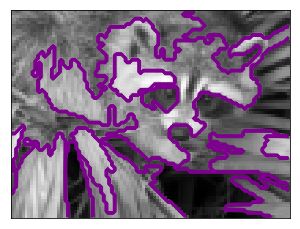

In [8]:
st = time.time()
n_clusters = 15
ward = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward', connectivity=connectivity)
ward.fit(X)
label = np.reshape(ward.labels_, face.shape)
print('Elapsed time: ', time.time())
print('Number of pixels', label.size)
print('Number of clusters: ', np.unique(label).size)

plt.figure(figsize=(5,5))
plt.imshow(face, cmap=plt.cm.gray)
for l in range(n_clusters):
    plt.contour(label==l, contours=1, colors=[plt.cm.nipy_spectral(1 / float(n_clusters)), ])
plt.xticks(())
plt.yticks(())
plt.show()


## 不同metrics衡量的Agglomerative clustering

In [16]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import pairwise_distances


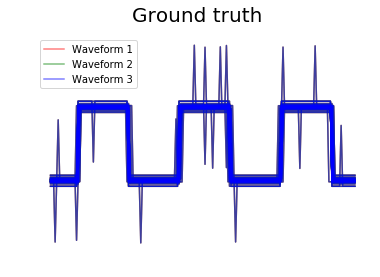

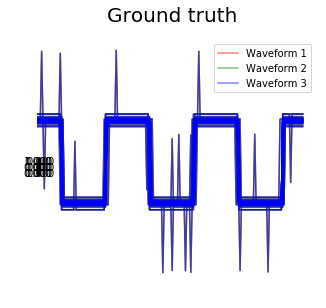

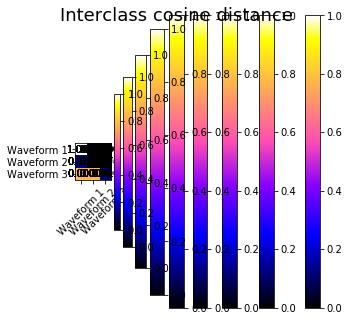

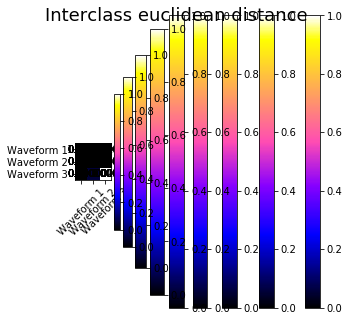

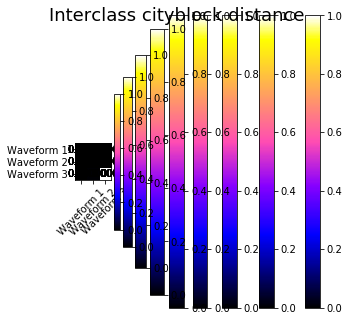

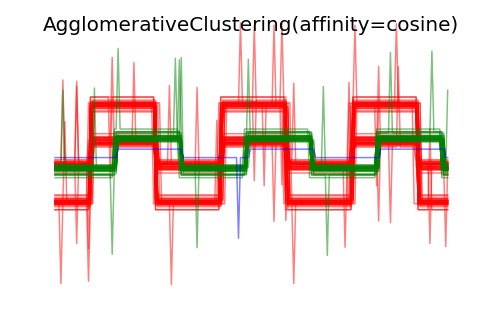

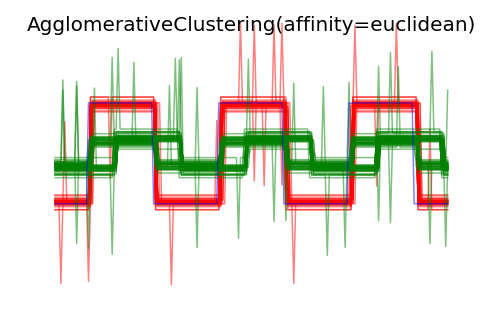

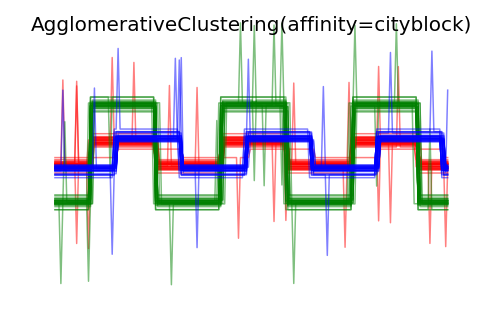

In [21]:
np.random.seed(0)
n_features = 200
t = np.pi * np.linspace(0, 1,  n_features)

def sqr(x):
    return np.sign(np.cos(x))
X = list()
Y = list()
for i, (phi, a) in enumerate([(.5, .15), (.5, .6), (.3, .2)]):
    for _ in range(30):
        phase_noise = .01 * np.random.normal()
        amplitude_noise = .04 * np.random.normal()
        additional_noise = 1 - 2 * np.random.rand(n_features)
        additional_noise[np.abs(additional_noise) < .997] = 0
        X.append(12 * ((a + amplitude_noise) * (sqr(6 * (t + phi + phase_noise))) + additional_noise ))
        Y.append(i)

X = np.array(X)
Y = np.array(Y)
n_clusters = 3
labels = ('Waveform 1', 'Waveform 2', 'Waveform 3')

for l, c, n in zip(range(n_clusters), 'rgb', labels):
    lines = plt.plot(X[Y == 1].T, c=c, alpha=.5)
    lines[0].set_label(n)

plt.legend(loc='best')
plt.axis('tight')
plt.axis('off')
plt.suptitle('Ground truth', size=20)

for index, metric in enumerate(['cosine', 'euclidean', 'cityblock']):
    avg_dist = np.zeros((n_clusters, n_clusters))
    plt.figure(figsize=(5, 4.5))
    for i in range(n_clusters):
        for j in range(n_clusters):
            avg_dist[i, j] = pairwise_distances(X[Y == i], X[Y == j], metric=metric).mean()
            avg_dist /= avg_dist.max()
            for i in range(n_clusters):
                for j in range(n_clusters):
                    plt.text(i, j, '%5.3f' % avg_dist[i, j], verticalalignment='center', horizontalalignment='center')
            plt.imshow(avg_dist, interpolation='nearest', cmap=plt.cm.gnuplot2, vmin=0)
            plt.xticks(range(n_clusters), labels, rotation=45)
            plt.yticks(range(n_clusters), labels)
            plt.colorbar()
            plt.suptitle('Interclass %s distance' % metric, size=18)
            plt.tight_layout()
for index, metric in enumerate(['cosine', 'euclidean', 'cityblock']):
    model = AgglomerativeClustering(n_clusters=n_clusters, linkage='average', affinity=metric)
    model.fit(X)
    plt.figure()
    plt.axes([0, 0, 1, 1])
    for l, c in zip(np.arange(model.n_clusters), 'rgbk'):
        plt.plot(X[model.labels_ == l].T, c=c, alpha=.5)
    plt.axis('tight')
    plt.axis('off')
    plt.suptitle('AgglomerativeClustering(affinity=%s)' % metric, size=20)

plt.show()